In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

traindata = pd.read_csv("/home/michael/Downloads/Dataset(1)/train.csv")
testdata = pd.read_csv("/home/michael/Downloads/Dataset(1)/test.csv")


In [3]:
df_house=traindata

In [4]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Text(0.5, 1, 'Correlation Between Features')

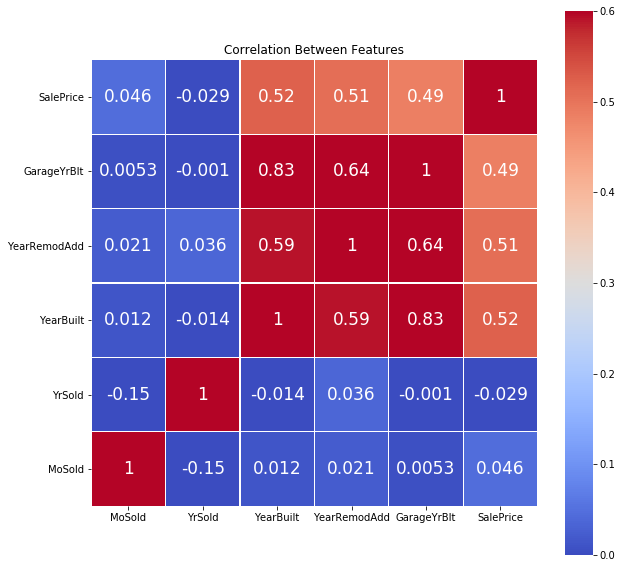

In [5]:
#Correlation Calculations
my_df = df_house[['MoSold','YrSold','YearBuilt','YearRemodAdd','GarageYrBlt', 'SalePrice']]
cor=my_df.corr()
plt.figure(figsize=(10, 10))
x=sns.heatmap(cor,
             cmap='coolwarm', vmax= 0.6, vmin=0, linewidths=0.1, annot=True, annot_kws={"size": 17}, square= True);
x.set_ylim((0,6))
plt.title("Correlation Between Features")

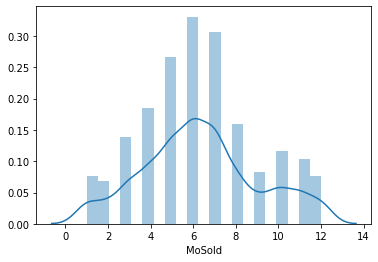

In [6]:
sns.distplot(df_house['MoSold'])

In [7]:
df_house['MoSold'].describe()


count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64

In [8]:
df_house['MoSold'].mode()

0    6
dtype: int64

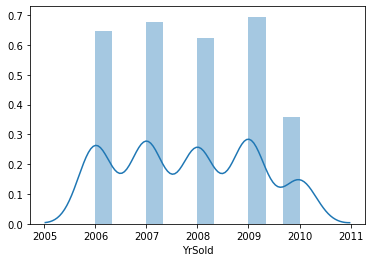

In [9]:
sns.distplot(df_house['YrSold'])

In [10]:
df_house['YrSold'].describe()

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

In [11]:
df_house['YrSold'].mode()

0    2009
dtype: int64

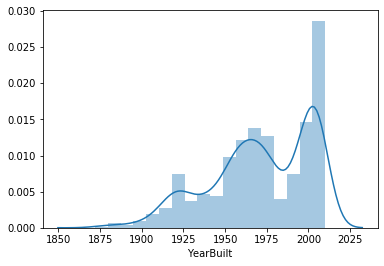

In [12]:
yearblt=df_house['YearBuilt']
sns.distplot(yearblt)
#this variable is unaffected by log,... because it is a categorical variable

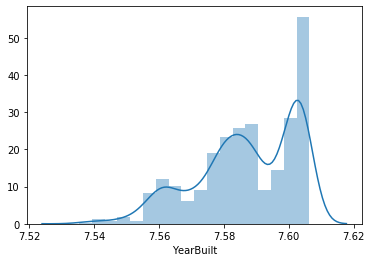

In [13]:
yearBuilt2=(df_house['YearBuilt'])
yearBuiltlogged=yearBuilt2.apply(lambda x: np.log1p(x))
sns.distplot(yearBuiltlogged, hist=True)

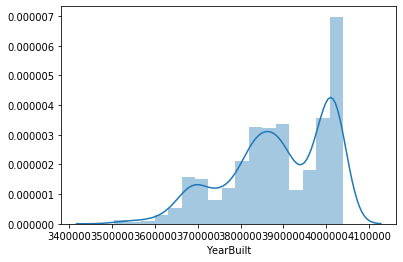

In [14]:
yearBuilt=(df_house['YearBuilt'])
yearBuiltsquared=((yearBuilt)**2)
sns.distplot(yearBuiltsquared, hist=True)


In [15]:
count_by_year=[]
for i in yearblt.unique():
    count_by_year.append(df_house[df_house['YearBuilt']==i].count()['Id'])

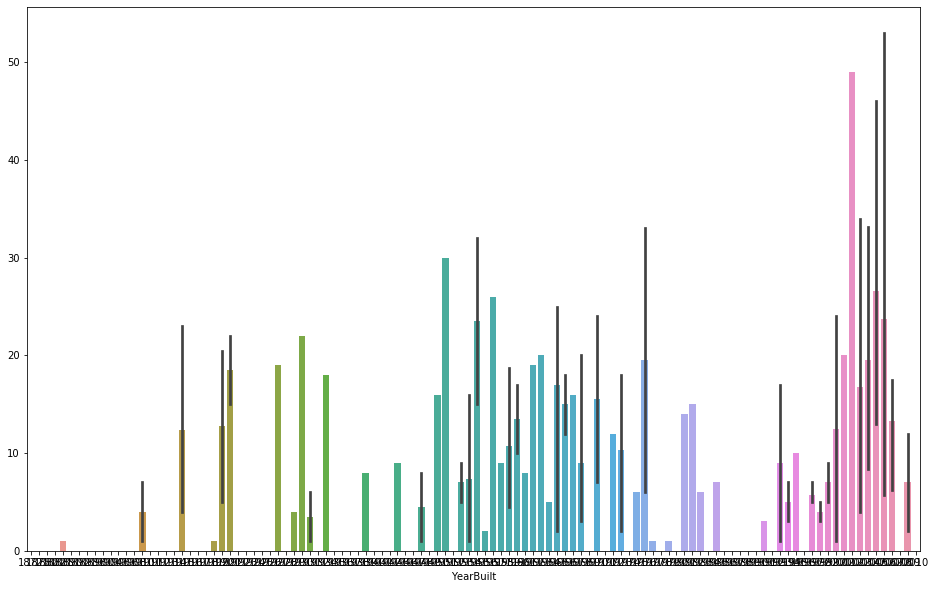

In [16]:
plt.figure(figsize=(16,10))
sns.barplot(yearblt, count_by_year)

In [17]:
df_house['YearBuilt'].describe()


count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [18]:
df_house['YearBuilt'].mode()

0    2006
dtype: int64

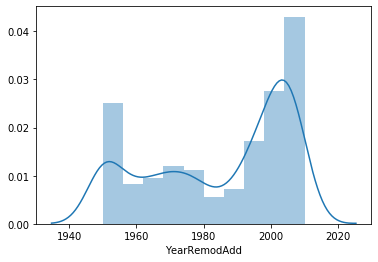

In [19]:

sns.distplot(df_house['YearRemodAdd'])


In [20]:
df_house['YearRemodAdd'].describe()


count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [21]:
df_house['YearRemodAdd'].mode()

0    1950
dtype: int64

In [22]:
valuecount=pd.value_counts(df_house['YearRemodAdd'])
print(valuecount)

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64


In [23]:
medgyb=df_house['GarageYrBlt'].median()
print(medgyb)

1980.0


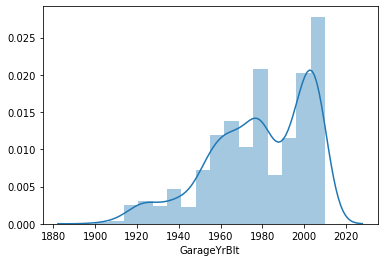

In [33]:
target5=df_house['GarageYrBlt'].fillna(df_house['GarageYrBlt'].median()).apply(int)
sns.distplot(target5)

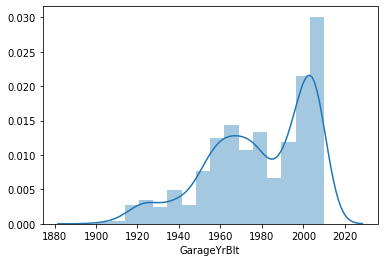

In [25]:
gyblt = df_house['GarageYrBlt'].ffill(axis=0)
sns.distplot(gyblt)

https://www.geeksforgeeks.org/python-pandas-dataframe-ffill/ ffill is good tool for handling NaN values with time series data. Ffill "forward fill" propogates last observation forward

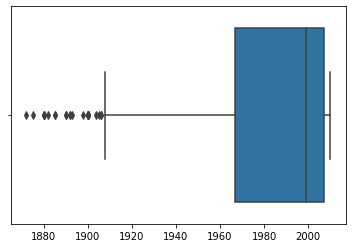

In [26]:
col=df_house[['YrSold','YearBuilt','YearRemodAdd', 'GarageYrBlt']]
sns.boxplot(col)

In [27]:
#I am handling the Unique variable Fence Variable as well

In [28]:
unv=df_house['Fence'].describe()
print(unv)

count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object


In [29]:
unvd=df_house['Fence']
print(unvd)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1455      NaN
1456    MnPrv
1457    GdPrv
1458      NaN
1459      NaN
Name: Fence, Length: 1460, dtype: object


Feature	Feature Code	Code Description
Fence	GdPrv	Good Privacy
Fence	MnPrv	Minimum Privacy
Fence	GdWo	Good Wood
Fence	MnWw	Minimum Wood/Wire
Fence	NA	No Fence

In [30]:
dict={"NA": 0, "MnWw": 1, "MnPrv": 1, "GdWo": 2, "GdPrv": 2}
print(dict)

{'NA': 0, 'MnWw': 1, 'MnPrv': 1, 'GdWo': 2, 'GdPrv': 2}


Unique Replacer

In [31]:
import pandas as pd

def fence_uniq(df_in):
    df_out = pd.DataFrame()
    df_out['Fence_Wood'] = df_in.replace(["MnWw", "GdWo", "NA", "MnPrv", "GdPrv"], [1, 2, 0, 0, 0]).fillna(0)
    df_out['Fence_Private'] = df_in.replace(["MnWw", "GdWo", "NA", "MnPrv", "GdPrv"], [0, 0, 0, 1, 2]).fillna(0)
    return df_out
    

In [32]:
#need to look at project from an overall perspective